In [3]:
# libraries used
import boto3
#import diff_classifier.aws as aws
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#from diff_classifier.features import calculate_features
from os import listdir, getcwd, chdir
from os.path import isfile, join
import os
#import diff_predictor
#from diff_predictor import spatial
from matplotlib import colors as plt_colors

#import altair as alt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import cuML

#import umap

#from kneed import KneeLocator

from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture

import shap

ModuleNotFoundError: No module named 'cuML'


CommandNotFoundError: Your shell has not been properly configured to use 'conda activate'.
To initialize your shell, run

    $ conda init <SHELL_NAME>

Currently supported shells are:
  - bash
  - fish
  - tcsh
  - xonsh
  - zsh
  - powershell

See 'conda init --help' for more information and options.

IMPORTANT: You may need to close and restart your shell after running 'conda init'.




In [64]:
df = pd.read_csv('~/cloudfiles/code/Users/nlsschim/raw_data_pnn/msd_NT_brain_3_slice_2_vid_3.csv')
df

Unnamed: 0  Frame  Track_ID            X            Y      MSDs  \
0                0    0.0       0.0   511.000000  1685.000000  0.000000   
1                1    1.0       0.0   511.000000  1686.000000  0.673300   
2                2    2.0       0.0   511.000000  1685.000000  0.884821   
3                3    3.0       0.0   511.000000  1686.000000  1.039848   
4                4    4.0       0.0   511.000000  1685.000000  1.061871   
...            ...    ...       ...          ...          ...       ...   
576781       42310  646.0     885.0  1654.431167   206.293976       NaN   
576782       42311  647.0     885.0  1647.302273   209.446327       NaN   
576783       42312  648.0     885.0  1641.297449   199.728495       NaN   
576784       42313  649.0     885.0  1640.036120   207.019286       NaN   
576785       42314  650.0     885.0  1648.772870   200.425093       NaN   

           Gauss   Quality  SN_Ratio  Mean_Intensity  
0       0.000000  4.667542  1.052255      375.852713  
1       2.475514  4.130493  1.032943      375.976744  
2       1.476336  4.770386  1.074277      378.992248  
3       1.602977  4.782013  1.040954      378.627907  
4       1.406718  3.977448  1.035721      375.736434  
...          ...       ...       ...             ...  
576781       NaN  3.248016  0.501934      332.782946  
576782       NaN  4.340302  0.865066      341.558140  
576783       NaN  6.584595  0.999417      347.255814  
576784       NaN  4.904602  0.884417      342.124031  
576785       NaN  6.909607  0.915414      345.341085  

[576786 rows x 10 columns]

In [66]:
df2 = pd.read_csv('~/cloudfiles/code/Users/nlsschim/features_ecm/features_NT_brain_3_slice_2_vid_3.csv')
df2[columns]


alpha      D_fit  kurtosis  asymmetry1  asymmetry2  asymmetry3  \
0    3.842503e-08   0.263361  3.284116    1.000000    0.000000    0.693147   
1    5.207045e-02   0.264772  3.442069    0.071347    0.760524    0.009295   
2    1.157640e+00   0.150670  4.072151    0.069527    0.763335    0.009048   
3    2.488379e-01  17.158382  2.052790    0.922611    0.141895    0.331783   
4    2.917728e-01  23.911704  1.665893    0.983157    0.065166    0.486340   
..            ...        ...       ...         ...         ...         ...   
881  4.405840e-01  15.917497  1.447489    0.985382    0.060676    0.497802   
882  1.777289e+00   3.351134  1.675331    0.992196    0.044256    0.542714   
883  1.398584e+00   0.208416  3.600217    0.238474    0.586328    0.034593   
884  6.717940e-01   8.000342  4.084922    0.910814    0.152807    0.314760   
885  8.299203e-01   9.045872  2.778766    0.941764    0.122471    0.364697   

           AR  elongation  boundedness  fractal_dim  ...  Mean elongation  \
0         inf    1.000000     0.055301     2.515279  ...         0.831773   
1    1.002002    0.001998     0.086891     3.129013  ...         0.446164   
2    1.020542    0.020129     0.236950     2.613160  ...         0.452334   
3    2.650808    0.622756     0.143522     2.172978  ...         0.452334   
4    2.237543    0.553081     0.022276     2.112222  ...         0.633724   
..        ...         ...          ...          ...  ...              ...   
881  2.305296    0.566216     0.046845     1.859294  ...         0.624845   
882  4.254350    0.764946     0.066249     1.146539  ...         0.495723   
883  1.310494    0.236929     0.210846     1.560391  ...         0.495723   
884  2.814782    0.644733     0.071892     1.632077  ...         0.343656   
885  2.302274    0.565647     0.082006     1.871373  ...         0.519853   

     Mean boundedness  Mean fractal_dim  Mean trappedness  Mean efficiency  \
0            0.113466          2.137363         -0.192927         0.366510   
1            0.098036          1.798335         -0.197440         0.734721   
2            0.131385          2.029086         -0.187577         0.736727   
3            0.131385          2.029086         -0.187577         0.736727   
4            0.052782          1.658980         -0.211142         0.644137   
..                ...               ...               ...              ...   
881          0.097377          1.632779         -0.197871         0.450558   
882          0.150313          1.795287         -0.182115         0.660545   
883          0.150313          1.795287         -0.182115         0.660545   
884          0.193604          1.830236         -0.169915         0.616694   
885          0.102885          1.793190         -0.196270         0.550794   

     Mean straightness  Mean MSD_ratio  Mean Deff1            X            Y  
0             0.146811        0.166089    0.482976   511.000000  1685.000000  
1             0.307243        0.637705    0.314269   430.028144  2000.931854  
2             0.200436        0.264899    6.428325   242.768980  1756.872011  
3             0.200436        0.264899    6.428325   146.939505  1769.093516  
4             0.218723        0.038373    4.950927   237.718500  1992.620701  
..                 ...             ...         ...          ...          ...  
881           0.181271        0.256228    3.698776  1835.763918   303.891145  
882           0.241058        1.387576    8.139281  1704.514855   238.517287  
883           0.241058        1.387576    8.139281  1669.317920   240.044814  
884           0.251044        0.233767    7.370920  1666.053991   438.697668  
885           0.155360        0.554960    9.158935  1653.809474   209.685347  

[886 rows x 33 columns]

In [2]:
workbookDir = getcwd()
print('Current Notebook Dir: ' + workbookDir)
chdir(workbookDir) # Go to current workbook Dir
chdir('..')        # Go up one
print(f'Using current directory for loading data: {getcwd()}')
workbookDir = getcwd()

Current Notebook Dir: /mnt/batch/tasks/shared/LS_root/mounts/clusters/nance8core/code/Users/nlsschim
Using current directory for loading data: /mnt/batch/tasks/shared/LS_root/mounts/clusters/nance8core/code/Users


In [3]:
dataset_path = workbookDir + '/nlsschim/features_ecm/'
#msd_path = workbookDir + '/nlsschim/raw_data_pnn/'
filelist = [f for f in listdir(dataset_path) if isfile(join(dataset_path, f)) and 'feat' in f]
#msd_filelist = [f for f in listdir(msd_path) if isfile(join(msd_path, f)) and 'msd' in f]
#print(len(msd_filelist))
print(len(filelist))

180


In [8]:
# output_path = workbookDir + '/Users/nlsschim/features_ecm/'
# feat_filelist = [f for f in listdir(output_path) if isfile(join(output_path, f)) and 'features' in f]
# len(feat_filelist)

In [9]:
# remaining_msd = msd_filelist[58:]
# remaining_msd

In [10]:
# msd_df = pd.read_csv(msd_path + str(msd_filelist[0]))
# msd_df.head()

In [11]:
# for file in remaining_msd:
#     msd_df = pd.read_csv(msd_path+str(file))
#     print('starting: ' + file)
#     fea_df = calculate_features(msd_df, mean_values=True)
#     path = workbookDir
#     fname = 'features' + file[3:]
#     full_str = path + '/nlsschim/features_ecm/' + fname
#     fea_df.to_csv(full_str)
#     print(full_str)
#     print('')

In [4]:
fstats_tot = None
video_num = 0
for filename in filelist:
#     try:
        fstats = pd.read_csv(dataset_path + filename, encoding = "ISO-8859-1", index_col='Unnamed: 0')
        print('{} size: {}'.format(filename, fstats.shape))
        if 'HYase' in filename:
            fstats['Treatment'] = pd.Series(fstats.shape[0]*['HYase'], index=fstats.index)
        elif 'ChABC' in filename:
            fstats['Treatment'] = pd.Series(fstats.shape[0]*['ChABC'], index=fstats.index)
        elif 'NT' in filename:
            fstats['Treatment'] = pd.Series(fstats.shape[0]*['NT'], index=fstats.index)
        else:
            print('Error, no target')
        fstats['Video Number'] = pd.Series(fstats.shape[0]*[video_num], index=fstats.index)
        if fstats_tot is None:
            fstats_tot = fstats
        else:
            fstats_tot = fstats_tot.append(fstats, ignore_index=True)
        video_num += 1

features_ChABC_brain_1_slice_1_vid_1.csv size: (502, 67)
features_ChABC_brain_1_slice_1_vid_2.csv size: (1734, 67)
features_ChABC_brain_1_slice_1_vid_3.csv size: (593, 67)
features_ChABC_brain_1_slice_1_vid_4.csv size: (258, 67)
features_ChABC_brain_1_slice_1_vid_5.csv size: (888, 67)
features_ChABC_brain_1_slice_2_vid_1.csv size: (1350, 67)
features_ChABC_brain_1_slice_2_vid_2.csv size: (690, 67)
features_ChABC_brain_1_slice_2_vid_3.csv size: (1257, 67)
features_ChABC_brain_1_slice_2_vid_4.csv size: (1070, 67)
features_ChABC_brain_1_slice_2_vid_5.csv size: (1097, 67)
features_ChABC_brain_1_slice_3_vid_1.csv size: (1141, 67)
features_ChABC_brain_1_slice_3_vid_2.csv size: (1307, 67)
features_ChABC_brain_1_slice_3_vid_3.csv size: (650, 67)
features_ChABC_brain_1_slice_3_vid_4.csv size: (1594, 67)
features_ChABC_brain_1_slice_3_vid_5.csv size: (1212, 67)
features_ChABC_brain_2_slice_1_vid_1.csv size: (1133, 67)
features_ChABC_brain_2_slice_1_vid_2.csv size: (2291, 67)
features_ChABC_brain

features_NT_brain_2_slice_3_vid_1.csv size: (562, 67)
features_NT_brain_2_slice_3_vid_2.csv size: (853, 67)
features_NT_brain_2_slice_3_vid_3.csv size: (817, 67)
features_NT_brain_2_slice_3_vid_4.csv size: (598, 67)
features_NT_brain_2_slice_3_vid_5.csv size: (1062, 67)
features_NT_brain_3_slice_1_vid_1.csv size: (2917, 67)
features_NT_brain_3_slice_1_vid_2.csv size: (2268, 67)
features_NT_brain_3_slice_1_vid_3.csv size: (3859, 67)
features_NT_brain_3_slice_1_vid_4.csv size: (3271, 67)
features_NT_brain_3_slice_1_vid_5.csv size: (3054, 67)
features_NT_brain_3_slice_2_vid_1.csv size: (840, 67)
features_NT_brain_3_slice_2_vid_2.csv size: (572, 67)
features_NT_brain_3_slice_2_vid_3.csv size: (886, 67)
features_NT_brain_3_slice_2_vid_4.csv size: (364, 67)
features_NT_brain_3_slice_2_vid_5.csv size: (893, 67)
features_NT_brain_3_slice_3_vid_1.csv size: (596, 67)
features_NT_brain_3_slice_3_vid_2.csv size: (378, 67)
features_NT_brain_3_slice_3_vid_3.csv size: (434, 67)
features_NT_brain_3_sl

In [9]:
fstats_tot.head()

Track_ID     alpha      D_fit  kurtosis  asymmetry1  asymmetry2  \
0       0.0  0.816365  13.058749  2.551438    0.298735    0.541468   
1       1.0  1.161703   6.079955  2.095601    0.822425    0.220988   
2       2.0  0.917237  23.212111  1.744405    0.985075    0.061313   
3       3.0  0.118077  82.989569  1.882246    0.144911    0.669754   
4       4.0  1.157632   8.442376  3.135845    0.572443    0.372241   

   asymmetry3        AR  elongation  boundedness  ...  Mean Mean_Intensity  \
0    0.045251  1.580388    0.367244     0.055654  ...                  NaN   
1    0.227570  2.116028    0.527416     0.124585  ...                  NaN   
2    0.496155  4.052659    0.753248     0.083099  ...                  NaN   
3    0.019753  1.159049    0.137224     0.078294  ...                  NaN   
4    0.110529  1.324925    0.245240     0.058218  ...                  NaN   

   Std Mean_Intensity  Mean SN_Ratio  Std SN_Ratio  Mean Deff1  Std Deff1  \
0                 NaN       0.820048      0.032337   10.442310   1.272833   
1                 NaN       1.073503      0.216005   14.047563   0.000000   
2                 NaN       1.073503      0.216005   14.047563   0.000000   
3                 NaN       0.887472      0.073740   19.066433  12.801049   
4                 NaN       0.887472      0.073740   19.066433  12.801049   

   Mean Deff2  Std Deff2  Treatment  Video Number  
0         NaN        NaN      ChABC             0  
1         NaN        NaN      ChABC             0  
2         NaN        NaN      ChABC             0  
3         NaN        NaN      ChABC             0  
4         NaN        NaN      ChABC             0  

[5 rows x 69 columns]

In [55]:
fstats_tot.shape

(215893, 69)

In [56]:
fstats_tot[features].isnull().sum()/len(fstats_tot)


NameError: name 'features' is not defined

In [8]:
# The column Deff2 currently has a super high number (~97%) of null values, so might be worth not including
# As such, it is commented out below
columns = [
#     'alpha', # Fitted anomalous diffusion alpha exponenet
#     'D_fit', # Fitted anomalous diffusion coefficient
#     'kurtosis', # Kurtosis of track
#     'asymmetry1', # Asymmetry of trajecory (0 for circular symmetric, 1 for linear)
#     'asymmetry2', # Ratio of the smaller to larger principal radius of gyration
#     'asymmetry3', # An asymmetric feature that accnts for non-cylindrically symmetric pt distributions
#     'AR', # Aspect ratio of long and short side of trajectory's minimum bounding rectangle
#     'elongation', # Est. of amount of extension of trajectory from centroid
#     'boundedness', # How much a particle with Deff is restricted by a circular confinement of radius r
#     'fractal_dim', # Measure of how complicated a self similar figure is
#     'trappedness', # Probability that a particle with Deff is trapped in a region
#     'efficiency', # Ratio of squared net displacement to the sum of squared step lengths
#     'straightness', # Ratio of net displacement to the sum of squared step lengths
#     'MSD_ratio', # MSD ratio of the track
    'frames', # Number of frames the track spans
#    'Deff1', # Effective diffusion coefficient at 0.33 s
    #'Deff2', # Effective diffusion coefficient at 3.3 s
    'Mean alpha',
    'Mean D_fit',
    'Mean kurtosis',
    'Mean asymmetry1',
    'Mean asymmetry2',
    'Mean asymmetry3',
    'Mean AR',
    'Mean elongation',
    'Mean boundedness',
    'Mean fractal_dim',
    'Mean trappedness',
    'Mean efficiency',
    'Mean straightness',
    'Mean MSD_ratio',
    'Mean Deff1',
    #'Mean Deff2'
    'Treatment',
    'X',
    'Y'
]

target = 'Treatment'

ecm = fstats_tot[columns]#.drop(['Deff2', 'Mean Deff2', 'Std Deff2'], axis=1) # Removing since 97% is null
#ecm['Treatment'] = fstats_tot['Treatment']
ecm = ecm[~ecm.isin([np.nan, np.inf, -np.inf]).any(1)] # removes rows with nan or inf points


In [9]:
ecm.head()

frames  Mean alpha  Mean D_fit  Mean kurtosis  Mean asymmetry1  \
0    35.0    0.604203   24.568146       2.052891         0.507214   
1    10.0    1.039470   14.646033       1.920003         0.903750   
2    11.0    1.039470   14.646033       1.920003         0.903750   
3    31.0    0.486657   65.159873       2.119009         0.558401   
4    30.0    0.486657   65.159873       2.119009         0.558401   

   Mean asymmetry2  Mean asymmetry3   Mean AR  Mean elongation  \
0         0.407030         0.145493  1.776560         0.431899   
1         0.141151         0.361863  3.084343         0.640332   
2         0.141151         0.361863  3.084343         0.640332   
3         0.391627         0.126959  1.565429         0.319705   
4         0.391627         0.126959  1.565429         0.319705   

   Mean boundedness  Mean fractal_dim  Mean trappedness  Mean efficiency  \
0          0.049400          1.641608         -0.212149         0.404017   
1          0.103842          1.585415         -0.195700         0.899050   
2          0.103842          1.585415         -0.195700         0.899050   
3          0.119099          1.687495         -0.191269         0.319584   
4          0.119099          1.687495         -0.191269         0.319584   

   Mean straightness  Mean MSD_ratio  Mean Deff1 Treatment          X  \
0           0.145243        0.094254   10.442310     ChABC  30.058970   
1           0.343657       -0.044283   14.047563     ChABC  15.410076   
2           0.343657       -0.044283   14.047563     ChABC   4.318153   
3           0.138134        0.315902   19.066433     ChABC  59.259525   
4           0.138134        0.315902   19.066433     ChABC  73.478659   

             Y  
0  1932.997996  
1  1863.650855  
2  1897.500000  
3  1624.755781  
4  1659.931915

In [10]:
# Make sure classes are balanced. 
# I'm debating if this is needed since the classes are pretty balanced already

def balance_data(df, target, **kwargs):
    if 'random_state' not in kwargs:
        random_state = 1
    else:
        random_state = kwargs['random_state']
    df_target = []
    bal_df = []
    for name in df[target].unique():
        df_target.append((name, df[df[target] == name]))
    print(f"Ratio before data balance ({':'.join([str(i[0]) for i in df_target])}) = {':'.join([str(len(i[1])) for i in df_target])}")
    for i in range(len(df_target)):
        ratio = min([len(i[1]) for i in df_target])/len(df_target[i][1])
        bal_df.append(df_target[i][1].sample(frac=ratio, random_state=random_state))
    print(f"Ratio after balance ({':'.join([str(i[0]) for i in df_target])}) = {':'.join([str(len(i)) for i in bal_df])}")
    return pd.concat(bal_df)
bal_ecm = balance_data(ecm, target, random_state=1)

Ratio before data balance (ChABC:HYase:NT) = 69884:70527:66235
Ratio after balance (ChABC:HYase:NT) = 66235:66235:66235


In [17]:
bal_ecm.isna().sum() #binx currently gives 8 nan values, preventing binning

alpha                0
D_fit                0
kurtosis             0
asymmetry1           0
asymmetry2           0
asymmetry3           0
AR                   0
elongation           0
boundedness          0
fractal_dim          0
trappedness          0
efficiency           0
straightness         0
MSD_ratio            0
frames               0
Deff1                0
Mean alpha           0
Mean D_fit           0
Mean kurtosis        0
Mean asymmetry1      0
Mean asymmetry2      0
Mean asymmetry3      0
Mean AR              0
Mean elongation      0
Mean boundedness     0
Mean fractal_dim     0
Mean trappedness     0
Mean efficiency      0
Mean straightness    0
Mean MSD_ratio       0
Mean Deff1           0
Treatment            0
X                    0
Y                    0
dtype: int64

In [11]:
resolution = 128
assert not 2048%resolution and resolution >= 128, "resolution needs to be a factor of 2048 and > 128"
bins = list(range(0, 2048+1, resolution))
bin_labels = [int(i/resolution) for i in bins][:-1]
bal_ecm['binx'] = pd.cut(bal_ecm['X'], bins, labels=bin_labels, include_lowest=True)
bal_ecm.loc[bal_ecm['X'] < 0] = 0
bal_ecm['biny'] = pd.cut(bal_ecm.Y, bins, labels=bin_labels, include_lowest=True)
bal_ecm['bins'] = (len(bins)-1)*bal_ecm['binx'].astype(np.int32) + bal_ecm['biny'].astype(np.int32)
bal_ecm = bal_ecm[np.isfinite(bal_ecm['bins'])]
bal_ecm['bins'] = bal_ecm['bins'].astype(int)

In [ ]:
bal_ecm.shape

In [13]:
label_df = bal_ecm['Treatment']
features_df = bal_ecm.drop(['Treatment', 'X', 'Y', 'binx', 'biny', 'bins', 'frames'], axis=1)

ss = StandardScaler()
#scaled_features_df = ss.fit_transform(features_df)
scaled_df = pd.DataFrame(ss.fit_transform(features_df.values), columns=features_df.columns)
scaled_df['Treatment'] = label_df.values
scaled_df

Mean alpha  Mean D_fit  Mean kurtosis  Mean asymmetry1  \
0         0.437775    0.826230       0.047465        -0.204994   
1        -1.101037   -0.105835      -0.118864        -0.069248   
2         1.051806   -0.168098      -0.348086         1.103454   
3         1.054025   -0.597775       0.196163         0.424365   
4         0.072334    0.583484       0.035950         0.196179   
...            ...         ...            ...              ...   
198700   -0.421234   -0.362696      -0.605802        -0.455757   
198701   -1.786751   -1.193092       0.136364        -2.332553   
198702    0.757274   -1.496463       1.090358         0.857799   
198703   -0.801412   -1.319019      -0.424024        -0.124420   
198704   -0.219373    0.998454      -0.283043         0.090070   

        Mean asymmetry2  Mean asymmetry3   Mean AR  Mean elongation  \
0              0.240368        -0.518016 -0.047594        -0.368445   
1              0.029323         0.064819 -0.047594        -0.296595   
2             -1.105983         1.049282 -0.047594         1.130753   
3             -0.383271         0.684952 -0.047594         0.729025   
4             -0.137476        -0.089918 -0.047594         0.422009   
...                 ...              ...       ...              ...   
198700         0.411878        -0.184248 -0.047594        -0.317449   
198701         2.149919        -1.821522 -0.047594        -1.806869   
198702        -0.865786         0.742492 -0.047594         1.624212   
198703         0.193829        -0.340422 -0.047594        -0.556231   
198704        -0.117119         0.006287 -0.047594        -0.140186   

        Mean boundedness  Mean fractal_dim  Mean trappedness  Mean efficiency  \
0              -0.554842         -0.628261         -0.554801         0.334423   
1              -0.288702          1.043995         -0.278944        -0.938311   
2              -0.590064         -1.344259         -0.598092         1.380585   
3               0.466626         -0.970144          0.445572         0.899504   
4              -0.271750          0.126179         -0.261901        -0.250114   
...                  ...               ...               ...              ...   
198700          0.482302         -0.087957          0.493334         0.200466   
198701         -0.050809          2.049410         -0.035162        -1.557768   
198702          0.027918          0.716362          0.039366        -1.039585   
198703          1.613838          2.067613          1.623722        -1.344054   
198704          0.726589         -0.239011          0.711417        -0.510370   

        Mean straightness  Mean MSD_ratio  Mean Deff1 Treatment  
0                0.362322       -0.153546    0.563002     ChABC  
1               -1.254812        0.018088   -0.662348     ChABC  
2                1.513006       -0.223182    1.848758     ChABC  
3                1.242920        0.094892    0.136616     ChABC  
4               -0.072113       -0.056101   -0.431242     ChABC  
...                   ...             ...         ...       ...  
198700           0.052714       -0.136407   -0.350672        NT  
198701          -1.889089        0.525218   -1.109113        NT  
198702          -0.370313        0.014971   -1.184683        NT  
198703          -1.241671        0.331289   -1.101017        NT  
198704          -0.091511       -0.096378    0.123512        NT  

[198705 rows x 16 columns]

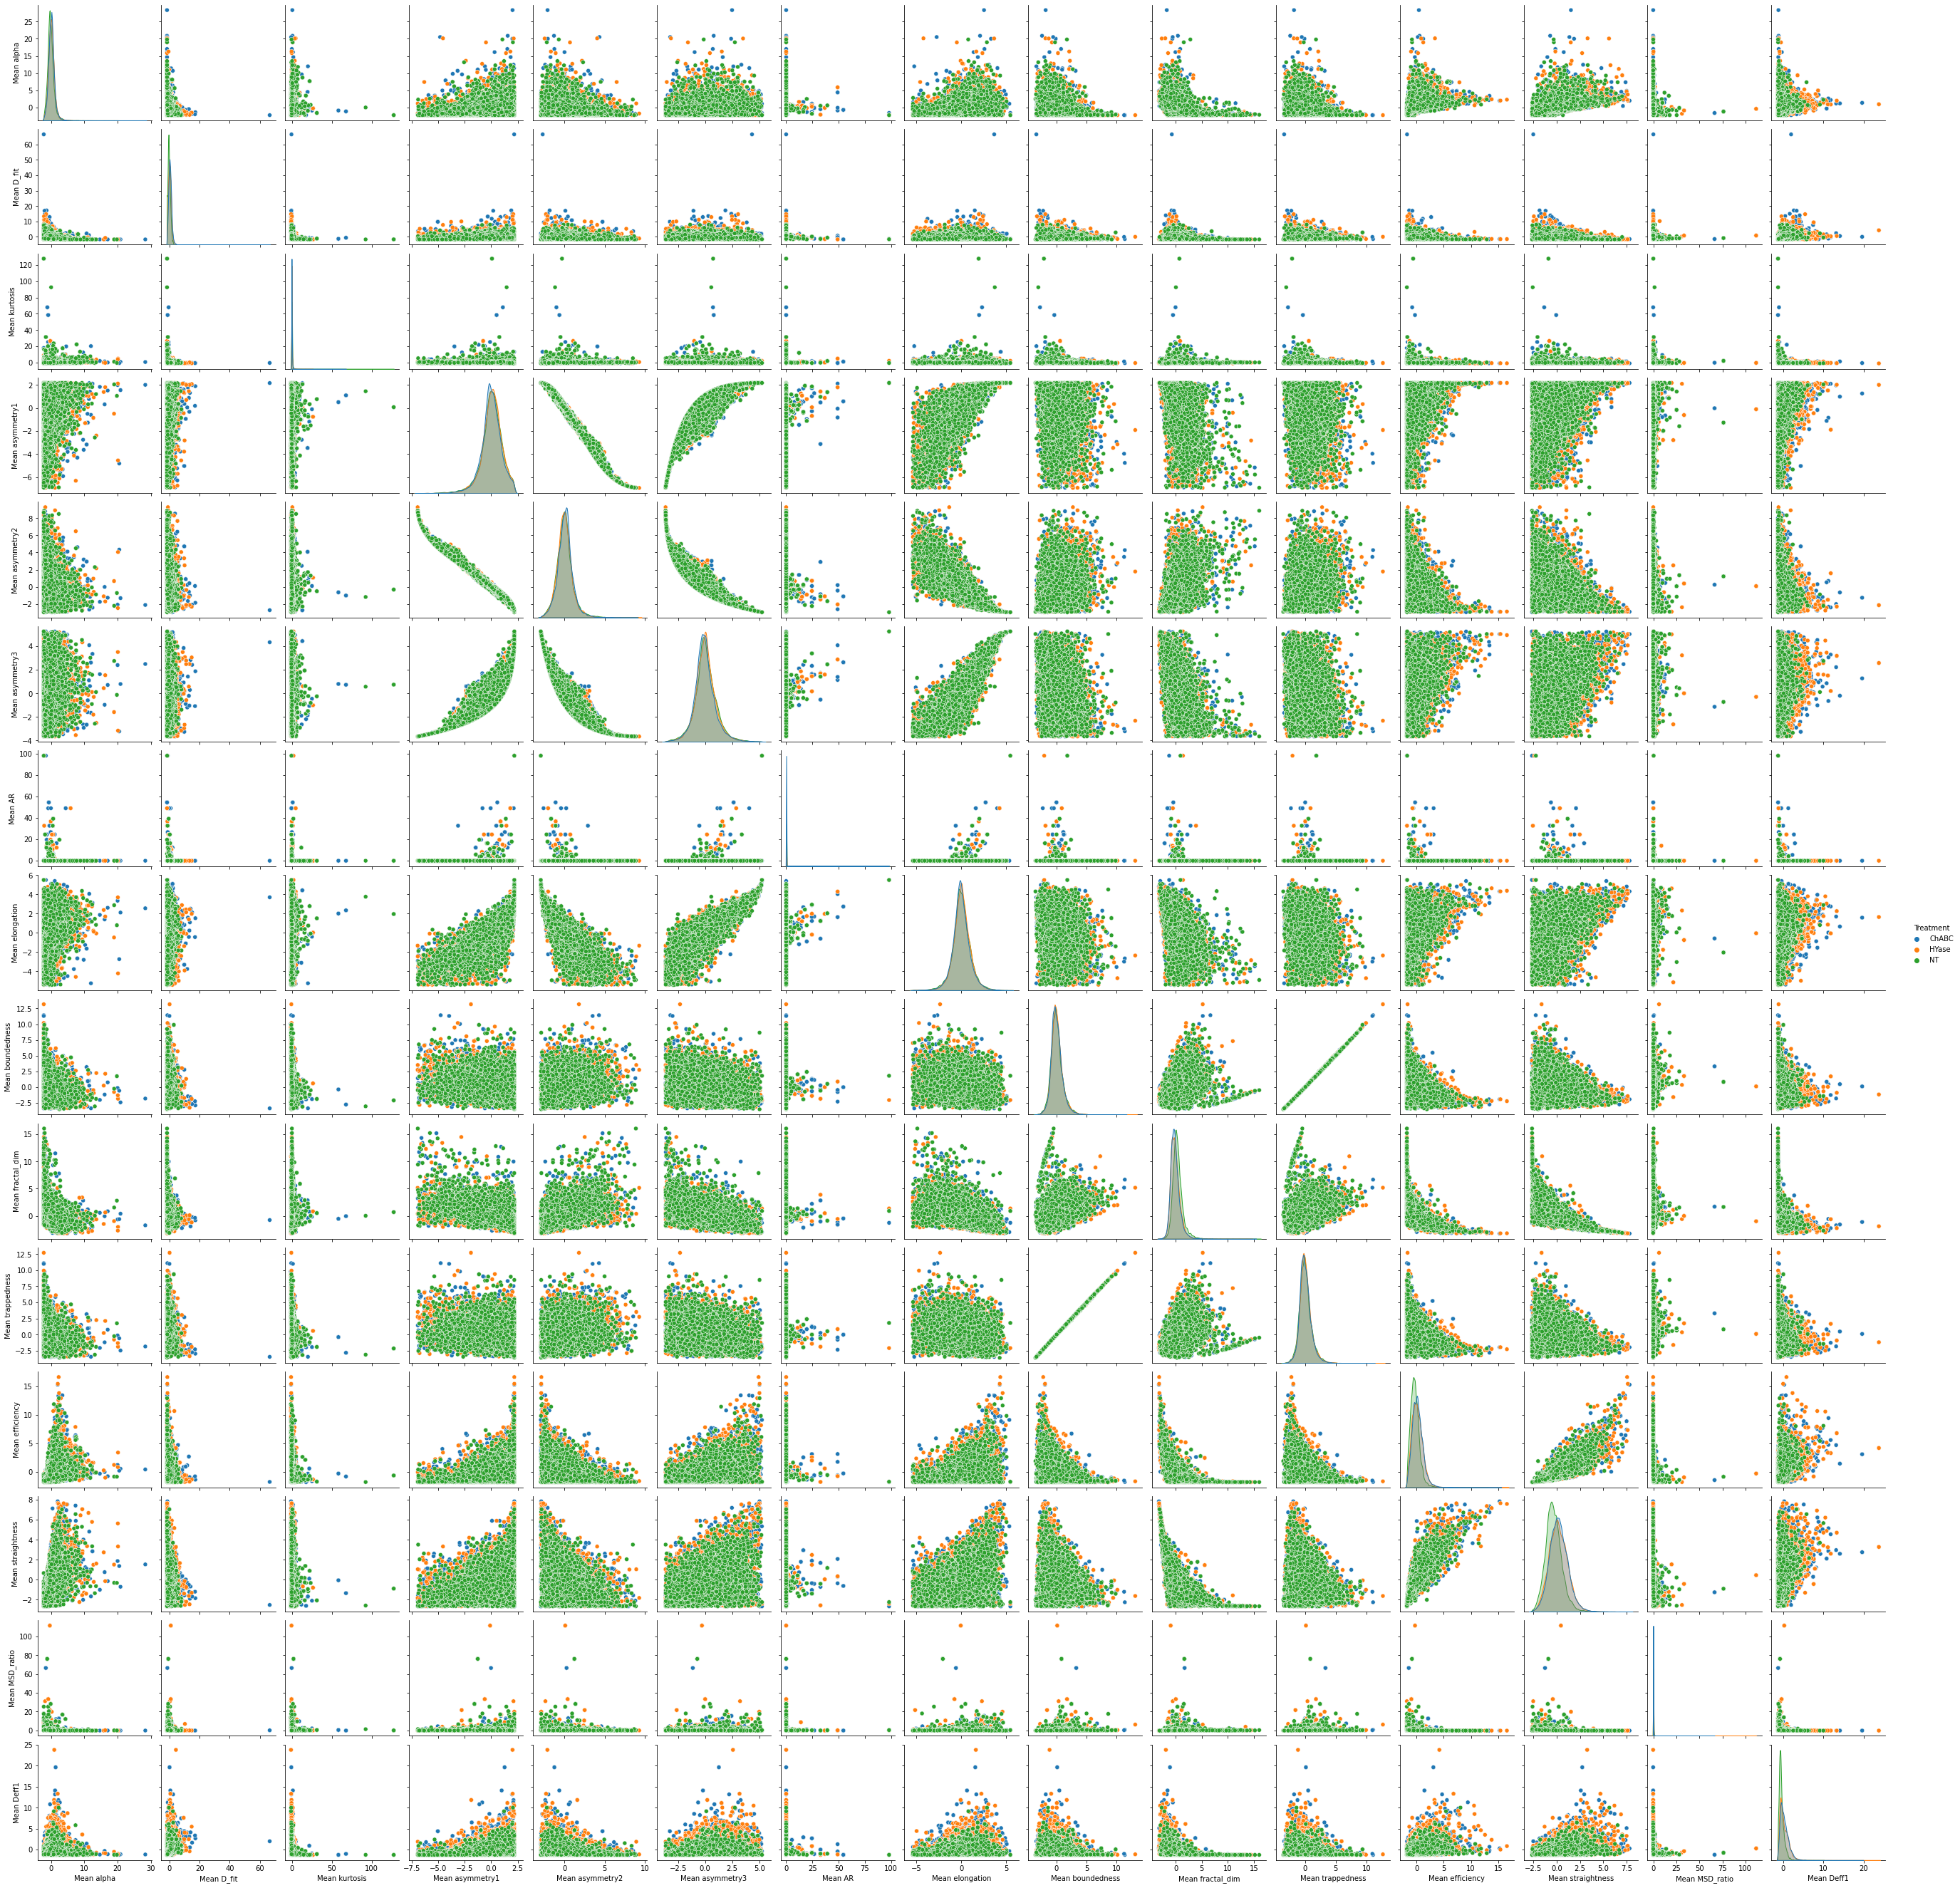

In [14]:
pairplot = sns.pairplot(scaled_df, hue='Treatment')
plt.savefig('ecm_pairplot.png', dpi=300)

In [44]:
# Get the components usng PCA

pca = PCA(n_components=14)
components = pca.fit_transform(scaled_df.drop('Treatment', axis=1))
print((scaled_df.shape))
print(pca.explained_variance_ratio_.sum())

NameError: name 'scaled_df' is not defined

In [28]:
# Get components with TSNE
tsne = TSNE(n_components=3, n_jobs=-1)
tsne_3comps = tsne.fit_transform(scaled_df.drop('Treatment', axis=1))

In [29]:
tsne_3comps

array([[ -8.129854  ,   6.805694  , -10.643883  ],
       [ -1.0347824 , -10.327929  ,  11.65931   ],
       [ 12.756832  ,  -4.905023  ,   0.07185435],
       ...,
       [ -3.8050275 ,  14.818349  ,  -4.079227  ],
       [  9.510323  ,   5.335888  ,  -1.2816187 ],
       [  8.315517  ,   2.048753  ,  -1.5445211 ]], dtype=float32)

In [31]:
tsne_df_3comp = pd.DataFrame({'comp_1': tsne_3comps[:, 0],
                            'comp_2': tsne_3comps[:, 1], 
                            'comp_3': tsne_3comps[:, 2],
                            'Treatment': label_df.values})

In [32]:
tsne_df_3comp.to_csv('tsne_3comp.csv')

In [4]:
tsne_df_3comp = pd.read_csv('~/cloudfiles/code/tsne_3comp.csv')


Text(0, 0.5, 'Component 2')

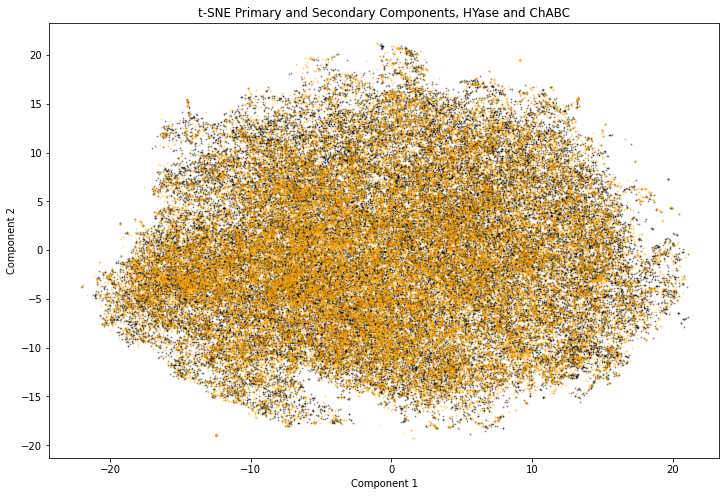

In [26]:
fig = plt.figure(figsize=(12,8))

df_nt =  tsne_df_3comp[tsne_df_3comp['Treatment'] == 'NT']
df_hyase =  tsne_df_3comp[tsne_df_3comp['Treatment'] == 'HYase']
df_chabc =  tsne_df_3comp[tsne_df_3comp['Treatment'] == 'ChABC']

#plt.scatter(x=df_nt['comp_1'], y=df_nt['comp_2'], label='NT', s=1, alpha=0.3, c='c')
plt.scatter(x=df_hyase['comp_1'], y=df_hyase['comp_2'], label='HYase', s=0.7, alpha=.4, c='k')
plt.scatter(x=df_chabc['comp_1'], y=df_chabc['comp_2'], label='ChABC', s=0.7, alpha=.4
            , c='orange')
plt.title('t-SNE Primary and Secondary Components, HYase and ChABC')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

Text(0, 0.5, 'Component 3')

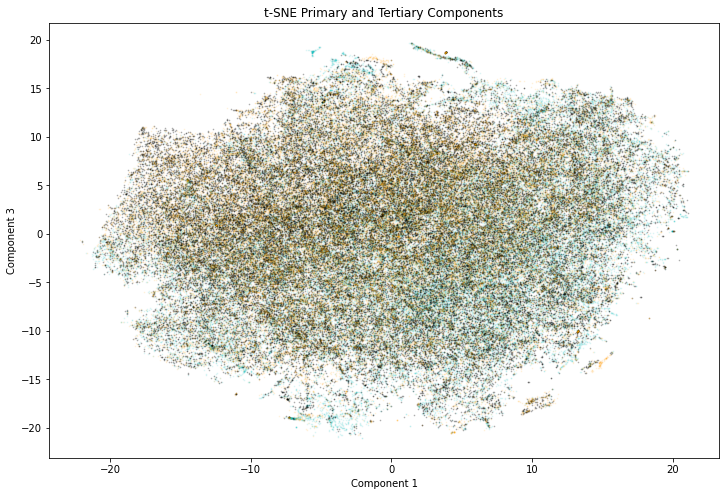

In [105]:
fig = plt.figure(figsize=(12,8))

plt.scatter(x=df_nt['comp_1'], y=df_nt['comp_3'], label='NT', s=0.5, alpha=0.1, c='c')
plt.scatter(x=df_hyase['comp_1'], y=df_hyase['comp_3'], label='HYase', s=0.5, alpha=0.25, c='k')
plt.scatter(x=df_chabc['comp_1'], y=df_chabc['comp_3'], label='ChABC', s=0.5, alpha=0.1, c='orange')
plt.title('t-SNE Primary and Tertiary Components')
plt.xlabel('Component 1')
plt.ylabel('Component 3')

Text(0, 0.5, 'Component 3')

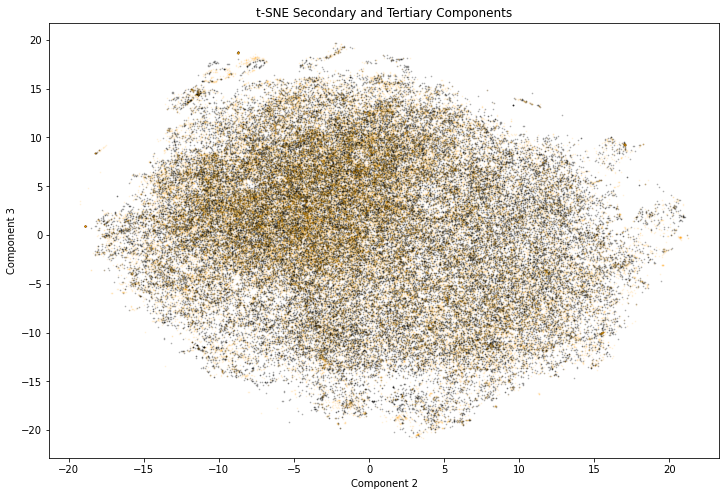

In [22]:
fig = plt.figure(figsize=(12,8))


#plt.scatter(x=df_nt['comp_2'], y=df_nt['comp_3'], label='NT', s=0.5, alpha=0.1, c='c')
plt.scatter(x=df_hyase['comp_2'], y=df_hyase['comp_3'], label='HYase', s=0.5, alpha=0.25, c='k')
plt.scatter(x=df_chabc['comp_2'], y=df_chabc['comp_3'], label='ChABC', s=0.5, alpha=0.1, c='orange')
plt.title('t-SNE Secondary and Tertiary Components')
plt.xlabel('Component 2')
plt.ylabel('Component 3')

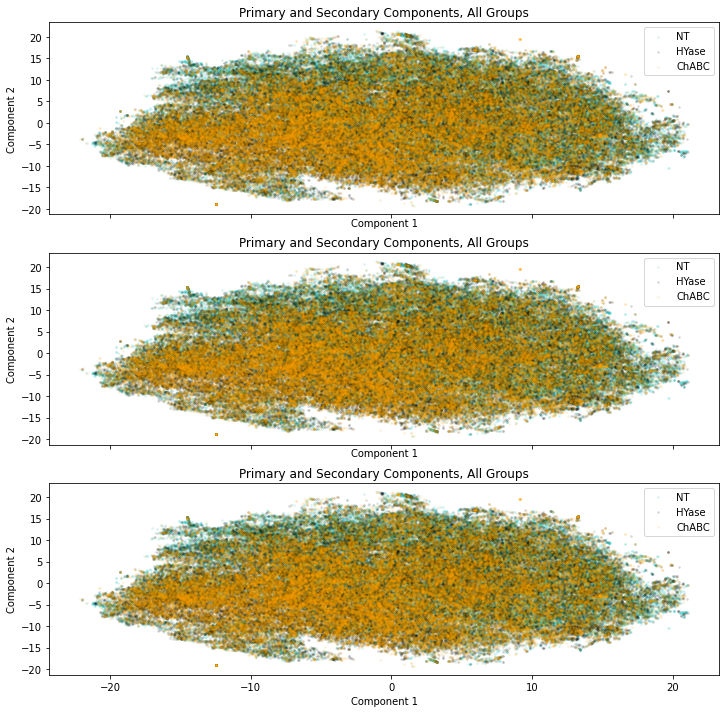

In [53]:
fig, ax = plt.subplots(3,1, sharex='col', sharey='row', figsize=(12,12))
color_list = ['orange', 'c', 'k']

df_nt =  tsne_df_3comp[tsne_df_3comp['Treatment'] == 'NT']
df_hyase =  tsne_df_3comp[tsne_df_3comp['Treatment'] == 'HYase']
df_chabc =  tsne_df_3comp[tsne_df_3comp['Treatment'] == 'ChABC']

ax[0].scatter(x=df_nt['comp_1'], y=df_nt['comp_2'], label='NT', s=3, alpha=0.1, c='c')
ax[0].scatter(x=df_hyase['comp_1'], y=df_hyase['comp_2'], label='HYase', s=3, alpha=0.1, c='k')
ax[0].scatter(x=df_chabc['comp_1'], y=df_chabc['comp_2'], label='ChABC', s=3, alpha=0.1, c='orange')
ax[0].set_title('Primary and Secondary Components, All Groups')
ax[0].set_xlabel('Component 1')
ax[0].set_ylabel('Component 2')
ax[0].legend()

ax[1].scatter(x=df_nt['comp_1'], y=df_nt['comp_2'], label='NT', s=3, alpha=0.1, c='c')
ax[1].scatter(x=df_hyase['comp_1'], y=df_hyase['comp_2'], label='HYase', s=3, alpha=0.1, c='k')
ax[1].scatter(x=df_chabc['comp_1'], y=df_chabc['comp_2'], label='ChABC', s=3, alpha=0.1, c='orange')
ax[1].set_title('Primary and Secondary Components, All Groups')
ax[1].set_xlabel('Component 1')
ax[1].set_ylabel('Component 2')
ax[1].legend()

ax[2].scatter(x=df_nt['comp_1'], y=df_nt['comp_2'], label='NT', s=3, alpha=0.1, c='c')
ax[2].scatter(x=df_hyase['comp_1'], y=df_hyase['comp_2'], label='HYase', s=3, alpha=0.1, c='k')
ax[2].scatter(x=df_chabc['comp_1'], y=df_chabc['comp_2'], label='ChABC', s=3, alpha=0.1, c='orange')
ax[2].set_title('Primary and Secondary Components, All Groups')
ax[2].set_xlabel('Component 1')
ax[2].set_ylabel('Component 2')
ax[2].legend()

Text(0.5, 0.98, 'Primary and Secondary t-SNE Components for Experimental Groups')

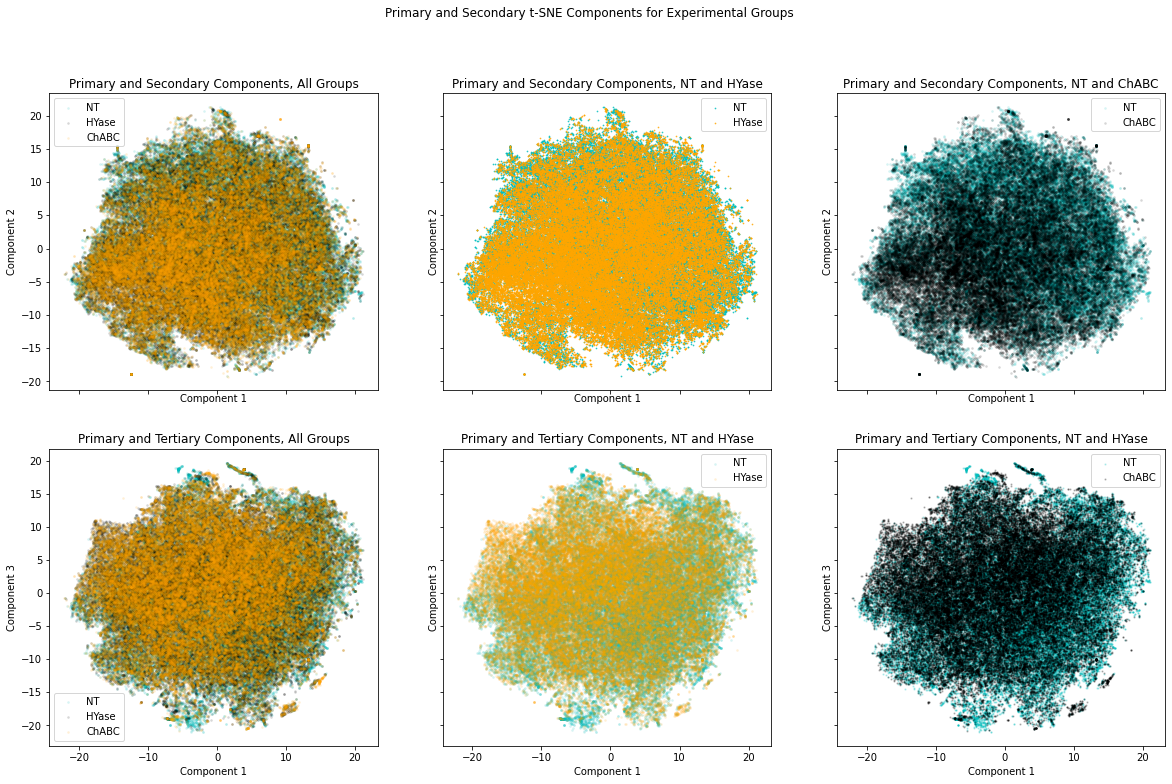

In [34]:
fig, ax = plt.subplots(2,3, sharex='col', sharey='row', figsize=(20,12))
color_list = ['orange', 'c', 'k']
# for i in range(len(result_cleaned['age'].unique())):
#     age = result_cleaned['age'].unique()[i]
    
#     df = tsne_df_3comp[tsne_df_3comp['age'] == age]
#     ax[0,0].scatter(x=df['comp_1'], y=df['comp_2'], label=age, s=3, alpha=0.5, c=color_list[i])
#     ax[0,0].legend()
#fig, ax = plt.subplots(2,2,figsize=(20,12))

df_nt =  tsne_df_3comp[tsne_df_3comp['Treatment'] == 'NT']
df_hyase =  tsne_df_3comp[tsne_df_3comp['Treatment'] == 'HYase']
df_chabc =  tsne_df_3comp[tsne_df_3comp['Treatment'] == 'ChABC']

ax[0,0].scatter(x=df_nt['comp_1'], y=df_nt['comp_2'], label='NT', s=3, alpha=0.1, c='c')
ax[0,0].scatter(x=df_hyase['comp_1'], y=df_hyase['comp_2'], label='HYase', s=3, alpha=0.1, c='k')
ax[0,0].scatter(x=df_chabc['comp_1'], y=df_chabc['comp_2'], label='ChABC', s=3, alpha=0.1, c='orange')
ax[0,0].set_title('Primary and Secondary Components, All Groups')
ax[0,0].set_xlabel('Component 1')
ax[0,0].set_ylabel('Component 2')
ax[0,0].legend()

ax[1,0].scatter(x=df_nt['comp_1'], y=df_nt['comp_3'], label='NT', s=3, alpha=0.1, c='c')
ax[1,0].scatter(x=df_hyase['comp_1'], y=df_hyase['comp_3'], label='HYase', s=3, alpha=0.1, c='k')
ax[1,0].scatter(x=df_chabc['comp_1'], y=df_chabc['comp_3'], label='ChABC', s=3, alpha=0.1, c='orange')
ax[1,0].set_title('Primary and Tertiary Components, All Groups')
ax[1,0].set_xlabel('Component 1')
ax[1,0].set_ylabel('Component 3')
ax[1,0].legend()

ax[0,1].scatter(x=df_nt['comp_1'], y=df_nt['comp_2'], label='NT', s=0.5, alpha=0.8, c='c')
ax[0,1].scatter(x=df_hyase['comp_1'], y=df_hyase['comp_2'], label='HYase', s=0.5, alpha=0.8, c='orange')
ax[0,1].set_title('Primary and Secondary Components, NT and HYase')
ax[0,1].set_xlabel('Component 1')
ax[0,1].set_ylabel('Component 2')
ax[0,1].legend()

ax[0,2].scatter(x=df_nt['comp_1'], y=df_nt['comp_2'], label='NT', s=3, alpha=0.1, c='c')
ax[0,2].scatter(x=df_chabc['comp_1'], y=df_chabc['comp_2'], label='ChABC', s=3, alpha=0.1, c='K')
ax[0,2].set_title('Primary and Secondary Components, NT and ChABC')
ax[0,2].set_xlabel('Component 1')
ax[0,2].set_ylabel('Component 2')
ax[0,2].legend()

# ax[1,1].scatter(x=df_70['comp_1'], y=df_70['comp_2'], label='70', s=3, alpha=0.5, c='orange')
# ax[1,1].scatter(x=df_35['comp_1'], y=df_35['comp_2'], label='35', s=3, alpha=0.5, c='k')
# ax[1,1].set_title('Primary and Secondary Components, Ages 35 and 70')
# ax[1,1].set_xlabel('Component 1')
# ax[1,1].set_ylabel('Component 2')
# ax[1,1].legend()

# ax[1,0].scatter(x=df_14['comp_1'], y=df_14['comp_2'], label='14', s=3, alpha=0.5, c='c')
# ax[1,0].scatter(x=df_35['comp_1'], y=df_35['comp_2'], label='35', s=3, alpha=0.5, c='K')
# ax[1,0].set_title('Primary and Secondary Components, Ages 14 and 35')
# ax[1,0].set_xlabel('Component 1')
# ax[1,0].set_ylabel('Component 2')
# ax[1,0].legend()

ax[1,2].scatter(x=df_nt['comp_1'], y=df_nt['comp_3'], label='NT', s=1.5, alpha=0.2, c='c')
ax[1,2].scatter(x=df_chabc['comp_1'], y=df_chabc['comp_3'], label='ChABC', s=1.5, alpha=0.2, c='k')
ax[1,2].set_title('Primary and Tertiary Components, NT and HYase')
ax[1,2].set_xlabel('Component 1')
ax[1,2].set_ylabel('Component 3')
ax[1,2].legend()

ax[1,1].scatter(x=df_nt['comp_1'], y=df_nt['comp_3'], label='NT', s=3, alpha=0.1, c='c')
ax[1,1].scatter(x=df_hyase['comp_1'], y=df_hyase['comp_3'], label='HYase', s=3, alpha=0.1, c='orange')
ax[1,1].set_title('Primary and Tertiary Components, NT and HYase')
ax[1,1].set_xlabel('Component 1')
ax[1,1].set_ylabel('Component 3')
ax[1,1].legend()

plt.suptitle('Primary and Secondary t-SNE Components for Experimental Groups')
#plt.savefig('t-sne_components_age.png', dpi=300)